# 전체 운전자 및 고령 운전자 교통사고 발생 건수 추이

In [3]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [4]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [5]:
plt.rc("font", family="Malgun Gothic")

In [6]:
traffic_accident_sql = """
    WITH total AS (
        SELECT
            SUM(total_2018) AS total_2018,
            SUM(total_2019) AS total_2019,
            SUM(total_2020) AS total_2020,
            SUM(total_2021) AS total_2021,
            SUM(total_2022) AS total_2022
        FROM
            `calcium-channel-428804-c3.traffic_accident.traffic_accident_5`
        UNION ALL
        SELECT
            SUM(total_2018) AS total_2018,
            SUM(total_2019) AS total_2019,
            SUM(total_2020) AS total_2020,
            SUM(total_2021) AS total_2021,
            SUM(total_2022) AS total_2022
        FROM
            `calcium-channel-428804-c3.traffic_accident.traffic_accident_5`
        WHERE
            age_group IN (65)
    )
    SELECT
        *
    FROM
        total;
"""

In [7]:
traffic_accident_df = client.query(traffic_accident_sql).to_dataframe()
traffic_accident_df.index = ["total", "65+"]
traffic_accident_df.rename(columns={"total_2018": "2018", "total_2019": "2019", "total_2020": "2020", "total_2021": "2021", "total_2022": "2022"}, inplace=True)

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [8]:
traffic_accident_df

,2018,2019,2020,2021,2022
total,212941,225509,206184,200177,194122
65+,30012,33239,31072,31841,34652


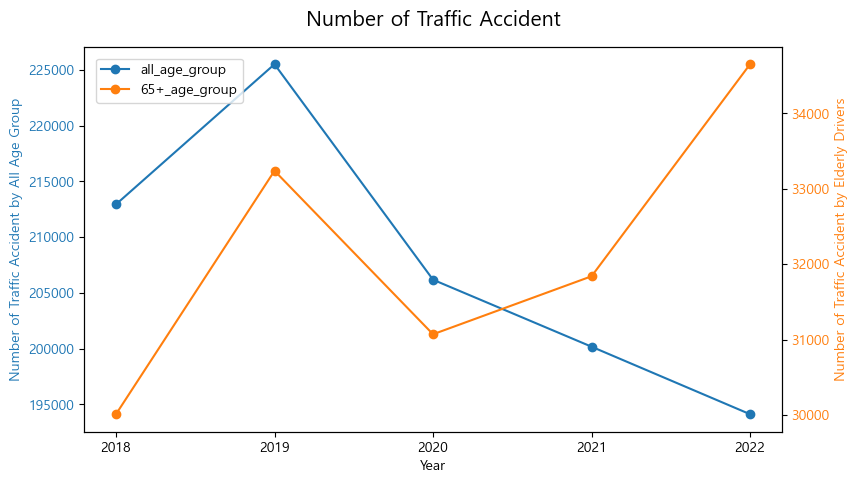

In [10]:
fig, ax1 = plt.subplots(figsize=(9, 5))

ax1.set_title("Number of Traffic Accident", size=15, pad=15)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Traffic Accident by All Age Group", color="tab:blue")
ax1.plot(traffic_accident_df.columns, traffic_accident_df.loc["total"], marker="o", label="all_age_group", color='tab:blue')
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Number of Traffic Accident by Elderly Drivers", color="tab:orange")
ax2.plot(traffic_accident_df.columns, traffic_accident_df.loc["65+"], marker="o", label="65+_age_group", color='tab:orange')
ax2.tick_params(axis="y", labelcolor="tab:orange")

fig.legend(loc="upper left", bbox_to_anchor=(0.13,0.87))
plt.savefig("./result/traffic_accident.png", bbox_inches="tight")